In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install statsmodels

     |████████████████████████████████| 16.8 MB 8.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.7 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 108.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.3 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 97.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 64.8 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 97.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df = df.dropna()

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [10]:
span = 12
alpha  = 2/(span+1)

In [11]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust= False).mean()

In [12]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [13]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [14]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [15]:
df['SES12']=fitted_model.fittedvalues.shift(-1)

In [16]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [19]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [20]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

In [23]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.figsize'] = (20, 10)

<AxesSubplot:xlabel='Month'>

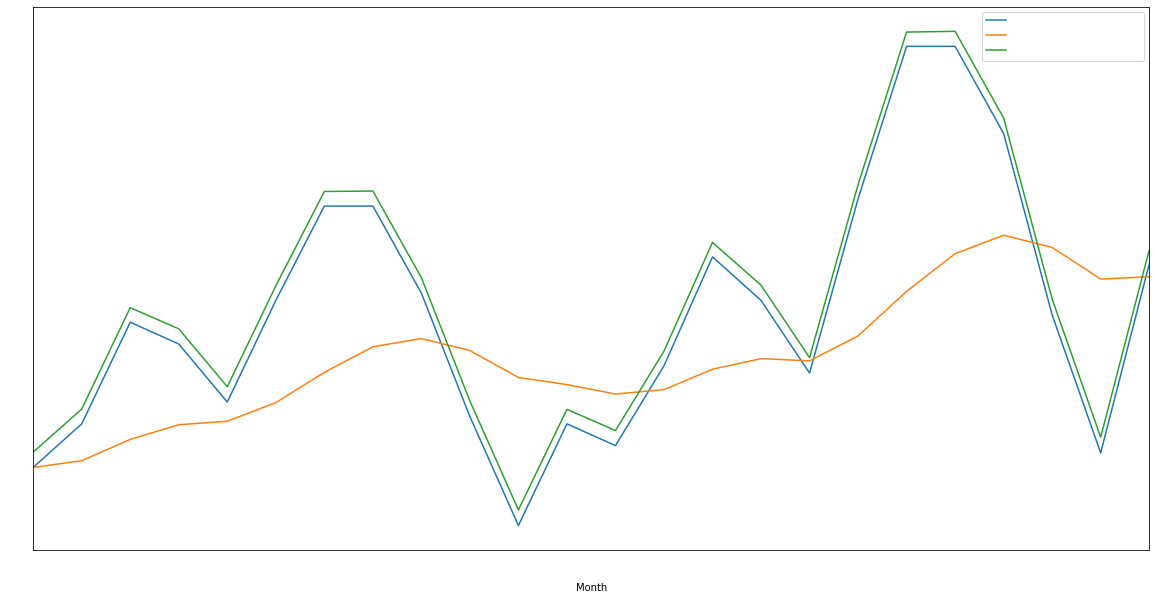

In [24]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot()

In [25]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [26]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


In [27]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

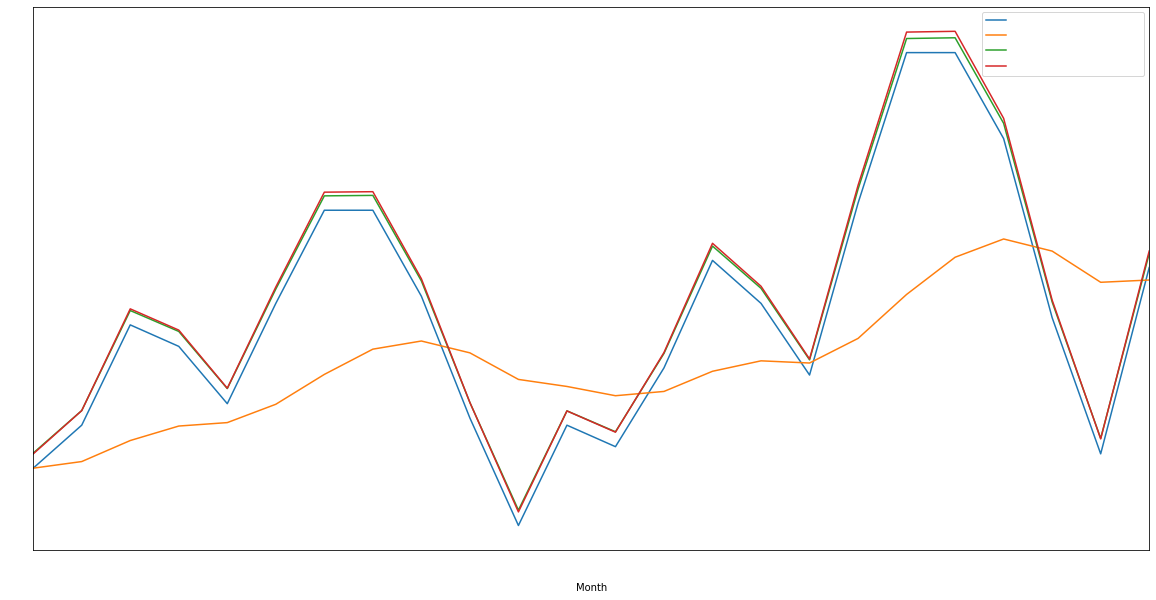

In [28]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot()

In [31]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.592072
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.842954
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.333217
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.901748
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.980377


In [33]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

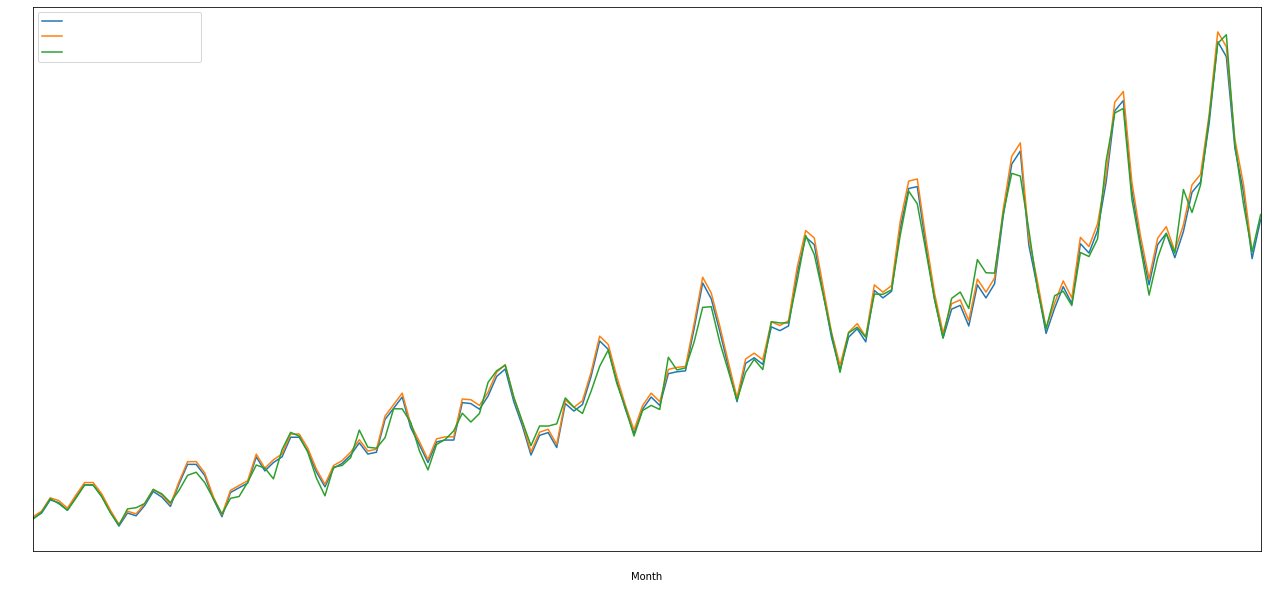

In [36]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].plot(figsize=(22,10))

<AxesSubplot:xlabel='Month'>

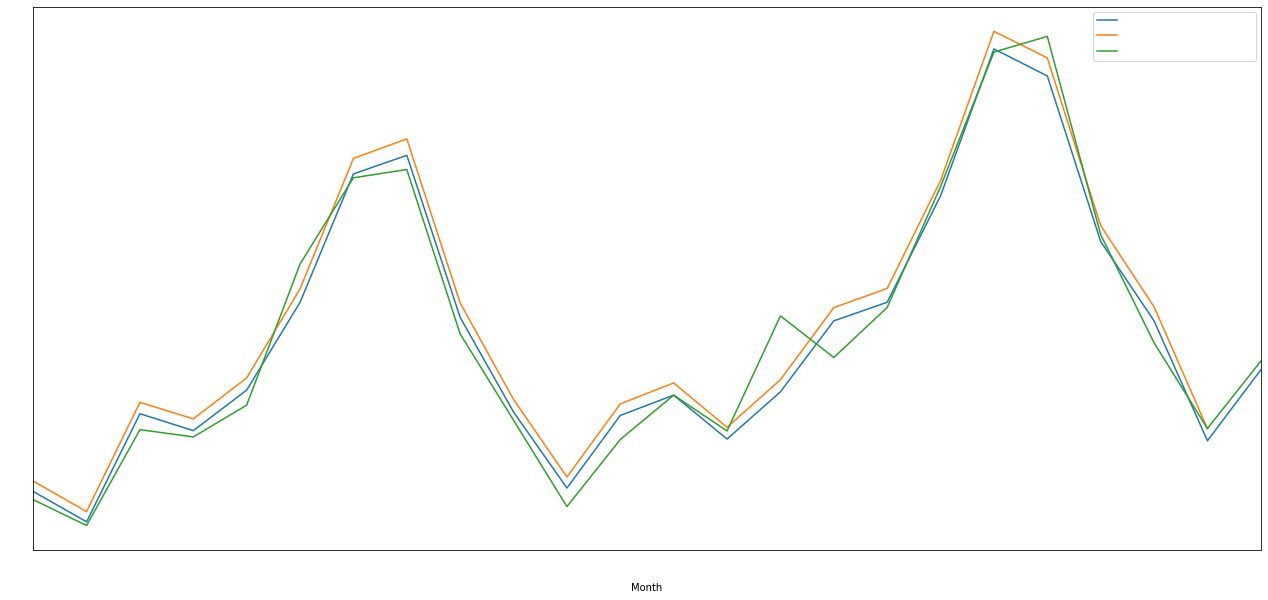

In [38]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(22,10))